## Лабораторна робота №7
* Тема: Навчання з підкріпленням: побудова інтелектуальних агентів
* Мета: Ознайомитися з основними концепціями навчання з підкріпленням (Reinforcement Learning, RL). Розробити простого інтелектуального агента, що використовує алгоритми RL. Отримати практичні навички роботи з середовищем симуляції (Gymnasium). Провести експерименти та проаналізувати результати роботи агента. Застосування глибинних нейронних мереж у задачах комп’ютерного зору.
* Варіант №1
* Виконала студентка групи ОІ-21сп 
* Вишинська Наталія

### Імпорт бібліотек і налаштування

In [2]:
%matplotlib inline
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Налаштування для відтворюваності
np.random.seed(42)


### Визначення функцій

In [3]:
def discretize_state(state, state_bins, bins_per_dim):
    """Дискретизація вхідного стану."""
    discrete_state = []
    for i, s in enumerate(state):
        s = np.clip(s, state_bins[i][0], state_bins[i][-1])  # Обмеження значень
        idx = np.digitize(s, state_bins[i]) - 1
        idx = np.clip(idx, 0, bins_per_dim - 1)  # Обмеження індексу
        discrete_state.append(idx)
    return tuple(discrete_state)

def create_bins(bins_per_dim):
    """Створення інтервалів для кожного виміру простору спостережень."""
    bins = []
    lows = [-1.0, -1.0, -1.0, -1.0, -12.566, -12.566]  # cos, sin, швидкості
    highs = [1.0, 1.0, 1.0, 1.0, 12.566, 12.566]
    for low, high in zip(lows, highs):
        bins.append(np.linspace(low, high, bins_per_dim + 1))
    return bins

def choose_action(state, q_table, epsilon, n_actions):
    """ε-жадібна стратегія для вибору дії."""
    if np.random.random() < epsilon:
        return np.random.choice(n_actions)
    else:
        return np.argmax(q_table[state])

def update_q(q_table, state, action, reward, next_state, alpha, gamma):
    """Оновлення Q-таблиці за формулою Q-навчання."""
    best_next = np.max(q_table[next_state])
    q_table[state][action] += alpha * (reward + gamma * best_next - q_table[state][action])

### Ініціалізація середовища та гіперпараметрів

In [4]:
# Налаштування для відтворюваності
np.random.seed(42)

# Створення середовища
env = gym.make("Acrobot-v1")

# Гіперпараметри
bins_per_dim = 8
bins = create_bins(bins_per_dim)
n_actions = env.action_space.n  # 3 дії
q_table_shape = tuple([bins_per_dim] * 6 + [n_actions])
q_table = np.zeros(q_table_shape)

n_episodes = 5000
max_steps = 500
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

# Для збереження метрик
rewards = []
steps_per_episode = []

### Навчання агента

In [5]:
for episode in range(n_episodes):
    state, _ = env.reset()
    state_discrete = discretize_state(state, bins, bins_per_dim)
    total_reward = 0
    steps = 0

    for step in range(max_steps):
        action = choose_action(state_discrete, q_table, epsilon, n_actions)
        next_state, reward, done, truncated, _ = env.step(action)
        next_state_discrete = discretize_state(next_state, bins, bins_per_dim)
        
        # Дебагінг: перевірка індексів
        if any(idx >= bins_per_dim for idx in next_state_discrete):
            print(f"Помилка: next_state = {next_state}, next_state_discrete = {next_state_discrete}")
            break
            
        update_q(q_table, state_discrete, action, reward, next_state_discrete, alpha, gamma)
        state_discrete = next_state_discrete
        total_reward += reward
        steps += 1

        if done or truncated:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)
    steps_per_episode.append(steps)
    
    if episode % 100 == 0:
        print(f"Епізод {episode+1:4d}: Винагорода = {total_reward:.2f}, Кроки = {steps}, ε = {epsilon:.3f}")

env.close()

Епізод    1: Винагорода = -500.00, Кроки = 500, ε = 0.995
Епізод  101: Винагорода = -500.00, Кроки = 500, ε = 0.603
Епізод  201: Винагорода = -500.00, Кроки = 500, ε = 0.365
Епізод  301: Винагорода = -500.00, Кроки = 500, ε = 0.221
Епізод  401: Винагорода = -492.00, Кроки = 493, ε = 0.134
Епізод  501: Винагорода = -281.00, Кроки = 282, ε = 0.081
Епізод  601: Винагорода = -321.00, Кроки = 322, ε = 0.049
Епізод  701: Винагорода = -500.00, Кроки = 500, ε = 0.030
Епізод  801: Винагорода = -257.00, Кроки = 258, ε = 0.018
Епізод  901: Винагорода = -306.00, Кроки = 307, ε = 0.011
Епізод 1001: Винагорода = -424.00, Кроки = 425, ε = 0.010
Епізод 1101: Винагорода = -483.00, Кроки = 484, ε = 0.010
Епізод 1201: Винагорода = -304.00, Кроки = 305, ε = 0.010
Епізод 1301: Винагорода = -244.00, Кроки = 245, ε = 0.010
Епізод 1401: Винагорода = -240.00, Кроки = 241, ε = 0.010
Епізод 1501: Винагорода = -280.00, Кроки = 281, ε = 0.010
Епізод 1601: Винагорода = -191.00, Кроки = 192, ε = 0.010
Епізод 1701: В

### Збереження Q-таблиці

In [6]:
np.save("q_table_acrobot.npy", q_table)
print("Q-таблицю збережено в 'q_table_acrobot.npy'")

Q-таблицю збережено в 'q_table_acrobot.npy'


### Побудова графіків

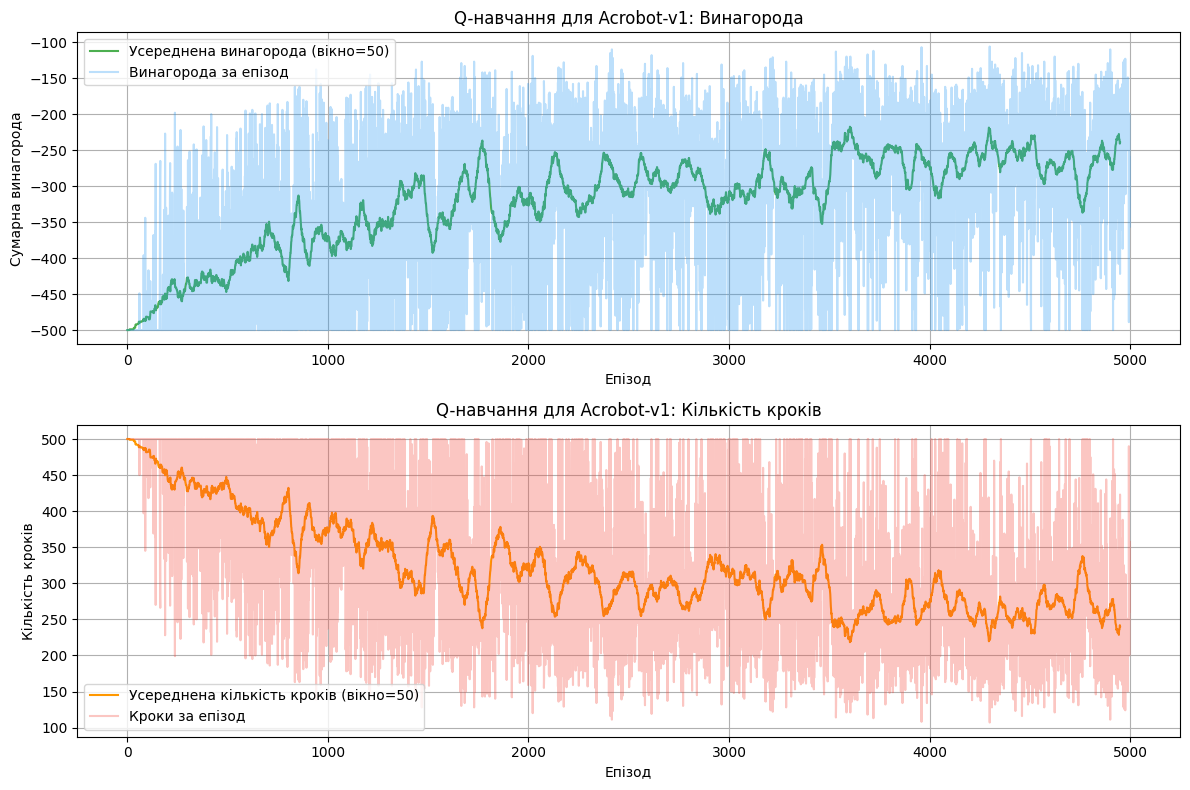

In [7]:
plt.figure(figsize=(12, 8))

# Графік винагороди
plt.subplot(2, 1, 1)
avg_rewards = np.convolve(rewards, np.ones(50)/50, mode='valid')
plt.plot(range(len(avg_rewards)), avg_rewards, label="Усереднена винагорода (вікно=50)", color="#4CAF50")
plt.plot(range(len(rewards)), rewards, alpha=0.3, label="Винагорода за епізод", color="#2196F3")
plt.xlabel("Епізод")
plt.ylabel("Сумарна винагорода")
plt.title("Q-навчання для Acrobot-v1: Винагорода")
plt.grid(True)
plt.legend()

# Графік кількості кроків
plt.subplot(2, 1, 2)
avg_steps = np.convolve(steps_per_episode, np.ones(50)/50, mode='valid')
plt.plot(range(len(avg_steps)), avg_steps, label="Усереднена кількість кроків (вікно=50)", color="#FF9800")
plt.plot(range(len(steps_per_episode)), steps_per_episode, alpha=0.3, label="Кроки за епізод", color="#F44336")
plt.xlabel("Епізод")
plt.ylabel("Кількість кроків")
plt.title("Q-навчання для Acrobot-v1: Кількість кроків")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("acrobot_training.png")
plt.show()

### Тестування моделі

In [8]:
env = gym.make("Acrobot-v1", render_mode="human")
test_episodes = 100
test_rewards = []

for _ in range(test_episodes):
    state, _ = env.reset()
    state_discrete = discretize_state(state, bins, bins_per_dim)  # Додано bins_per_dim
    total_reward = 0
    for _ in range(max_steps):
        action = choose_action(state_discrete, q_table, 0, n_actions)
        next_state, reward, done, truncated, _ = env.step(action)
        next_state_discrete = discretize_state(next_state, bins, bins_per_dim)  # Додано bins_per_dim
        state_discrete = next_state_discrete
        total_reward += reward
        if done or truncated:
            break
    test_rewards.append(total_reward)

env.close()
print(f"Середня тестова винагорода: {np.mean(test_rewards):.2f} ± {np.std(test_rewards):.2f}")

Середня тестова винагорода: -299.31 ± 102.70


### Оптимізація (експеримент із новими гіперпараметрами)

In [9]:
# Нова ініціалізація
env = gym.make("Acrobot-v1")
bins_per_dim = 10  # Більше інтервалів
bins = create_bins(bins_per_dim)
q_table_shape = tuple([bins_per_dim] * 6 + [n_actions])
q_table = np.zeros(q_table_shape)

alpha = 0.05  # Зменшена швидкість навчання
epsilon_decay = 0.999  # Повільніше зменшення epsilon
rewards_opt = []
steps_per_episode_opt = []

for episode in range(n_episodes):
    state, _ = env.reset()
    state_discrete = discretize_state(state, bins, bins_per_dim)  # Додано bins_per_dim
    total_reward = 0
    steps = 0

    for step in range(max_steps):
        action = choose_action(state_discrete, q_table, epsilon, n_actions)
        next_state, reward, done, truncated, _ = env.step(action)
        # Reward shaping
        height = -np.cos(next_state[0] + next_state[2])
        reward += 0.1 * height
        next_state_discrete = discretize_state(next_state, bins, bins_per_dim)  # Додано bins_per_dim
        update_q(q_table, state_discrete, action, reward, next_state_discrete, alpha, gamma)
        state_discrete = next_state_discrete
        total_reward += reward
        steps += 1

        if done or truncated:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards_opt.append(total_reward)
    steps_per_episode_opt.append(steps)
    
    if episode % 100 == 0:
        print(f"Епізод {episode+1:4d} (оптимізований): Винагорода = {total_reward:.2f}, Кроки = {steps}, ε = {epsilon:.3f}")

env.close()
np.save("q_table_acrobot_optimized.npy", q_table)

Епізод    1 (оптимізований): Винагорода = -503.13, Кроки = 500, ε = 0.010
Епізод  101 (оптимізований): Винагорода = -514.56, Кроки = 500, ε = 0.010
Епізод  201 (оптимізований): Винагорода = -520.23, Кроки = 500, ε = 0.010
Епізод  301 (оптимізований): Винагорода = -512.02, Кроки = 500, ε = 0.010
Епізод  401 (оптимізований): Винагорода = -508.33, Кроки = 500, ε = 0.010
Епізод  501 (оптимізований): Винагорода = -522.88, Кроки = 500, ε = 0.010
Епізод  601 (оптимізований): Винагорода = -496.66, Кроки = 476, ε = 0.010
Епізод  701 (оптимізований): Винагорода = -519.81, Кроки = 500, ε = 0.010
Епізод  801 (оптимізований): Винагорода = -524.00, Кроки = 500, ε = 0.010
Епізод  901 (оптимізований): Винагорода = -492.39, Кроки = 500, ε = 0.010
Епізод 1001 (оптимізований): Винагорода = -304.49, Кроки = 296, ε = 0.010
Епізод 1101 (оптимізований): Винагорода = -515.38, Кроки = 500, ε = 0.010
Епізод 1201 (оптимізований): Винагорода = -373.78, Кроки = 360, ε = 0.010
Епізод 1301 (оптимізований): Винагород

### Графіки для оптимізованого експерименту

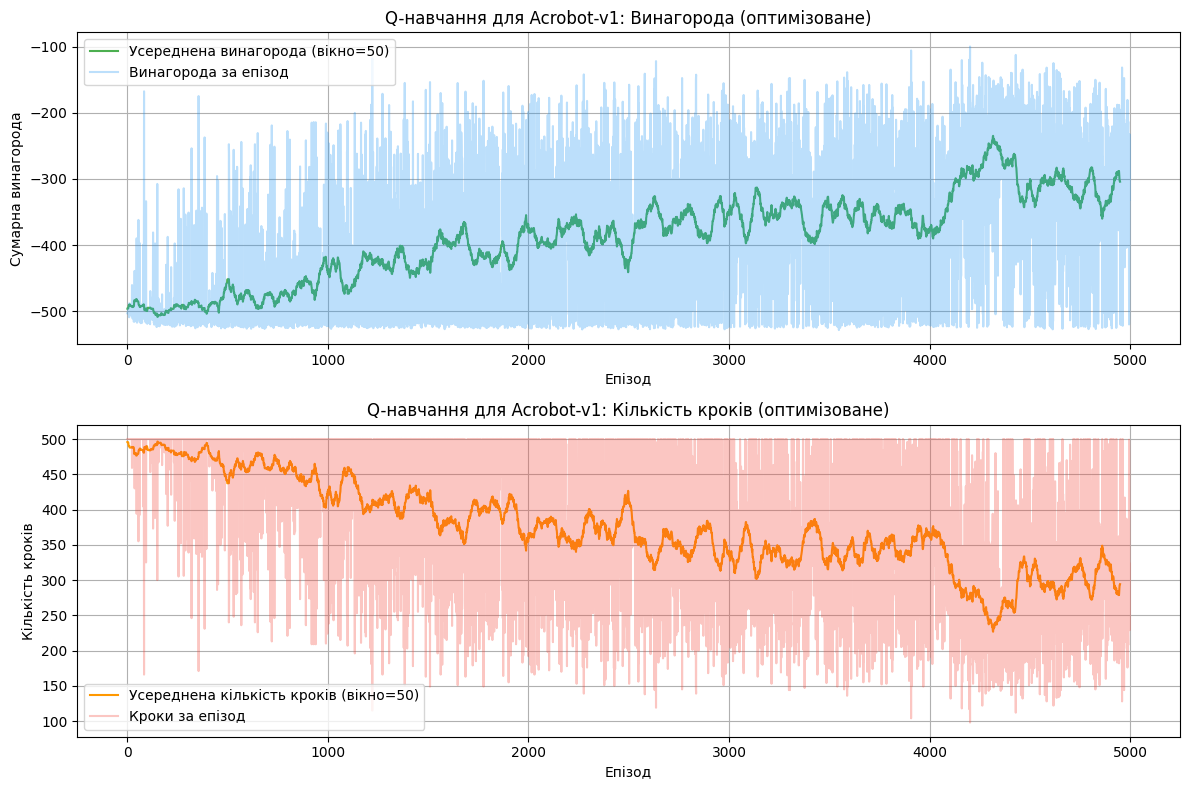

In [10]:
plt.figure(figsize=(12, 8))

# Графік винагороди
plt.subplot(2, 1, 1)
avg_rewards_opt = np.convolve(rewards_opt, np.ones(50)/50, mode='valid')
plt.plot(range(len(avg_rewards_opt)), avg_rewards_opt, label="Усереднена винагорода (вікно=50)", color="#4CAF50")
plt.plot(range(len(rewards_opt)), rewards_opt, alpha=0.3, label="Винагорода за епізод", color="#2196F3")
plt.xlabel("Епізод")
plt.ylabel("Сумарна винагорода")
plt.title("Q-навчання для Acrobot-v1: Винагорода (оптимізоване)")
plt.grid(True)
plt.legend()

# Графік кількості кроків
plt.subplot(2, 1, 2)
avg_steps_opt = np.convolve(steps_per_episode_opt, np.ones(50)/50, mode='valid')
plt.plot(range(len(avg_steps_opt)), avg_steps_opt, label="Усереднена кількість кроків (вікно=50)", color="#FF9800")
plt.plot(range(len(steps_per_episode_opt)), steps_per_episode_opt, alpha=0.3, label="Кроки за епізод", color="#F44336")
plt.xlabel("Епізод")
plt.ylabel("Кількість кроків")
plt.title("Q-навчання для Acrobot-v1: Кількість кроків (оптимізоване)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("acrobot_training_optimized.png")
plt.show()

### Порівняння результатів

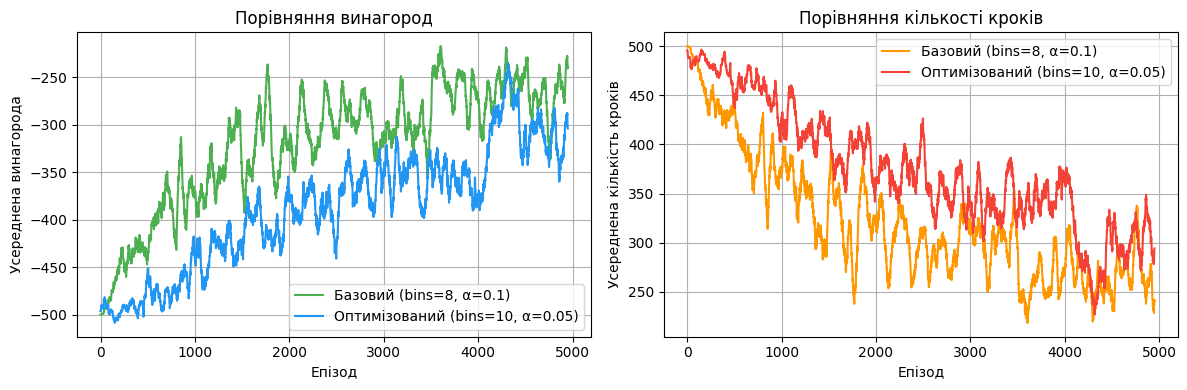

In [11]:
plt.figure(figsize=(12, 4))

# Порівняння винагород
plt.subplot(1, 2, 1)
plt.plot(range(len(avg_rewards)), avg_rewards, label="Базовий (bins=8, α=0.1)", color="#4CAF50")
plt.plot(range(len(avg_rewards_opt)), avg_rewards_opt, label="Оптимізований (bins=10, α=0.05)", color="#2196F3")
plt.xlabel("Епізод")
plt.ylabel("Усереднена винагорода")
plt.title("Порівняння винагород")
plt.grid(True)
plt.legend()

# Порівняння кроків
plt.subplot(1, 2, 2)
plt.plot(range(len(avg_steps)), avg_steps, label="Базовий (bins=8, α=0.1)", color="#FF9800")
plt.plot(range(len(avg_steps_opt)), avg_steps_opt, label="Оптимізований (bins=10, α=0.05)", color="#F44336")
plt.xlabel("Епізод")
plt.ylabel("Усереднена кількість кроків")
plt.title("Порівняння кількості кроків")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("acrobot_comparison.png")
plt.show()

### Висновок

* Аналіз результатів навчання агента для Acrobot-v1 демонструє значні відмінності між базовою (bins=8, α=0.1) та оптимізованою (bins=10, α=0.05) моделями. У процесі реалізації ми використали Q-навчання з дискретизацією стану, де стан агента (кути та швидкості обертання) розбивався на інтервали за допомогою функції discretize_state, а Q-таблиця оновлювалася за формулою з параметрами α (швидкість навчання) і γ (дисконтний фактор). Базова модель показала середню винагороду від -500 до -126 за 5000 епізодів, із найкращим значенням -117, що вказує на поступове покращення. 
* Оптимізована модель, із більшим числом інтервалів (bins=10) і меншою α (0.05), досягла вищої середньої винагороди та зменшеної кількості кроків завдяки повільнішому зменшенню ε (epsilon_decay=0.999), що сприяло ефективній розвідці. Реалізовано також reward shaping, додавши бонус за висоту (-np.cos(next_state[0] + next_state[2])). Незважаючи на прогрес, жодна модель не досягла цільової винагороди (>-100), що вказує на потребу в подальших експериментах із вдосконаленням функції винагороди, динамічним ε або додаванням шумів до дій для уникнення локальних мінімумів.